# Practice Assignment: Understanding Distributions Through Sampling

To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


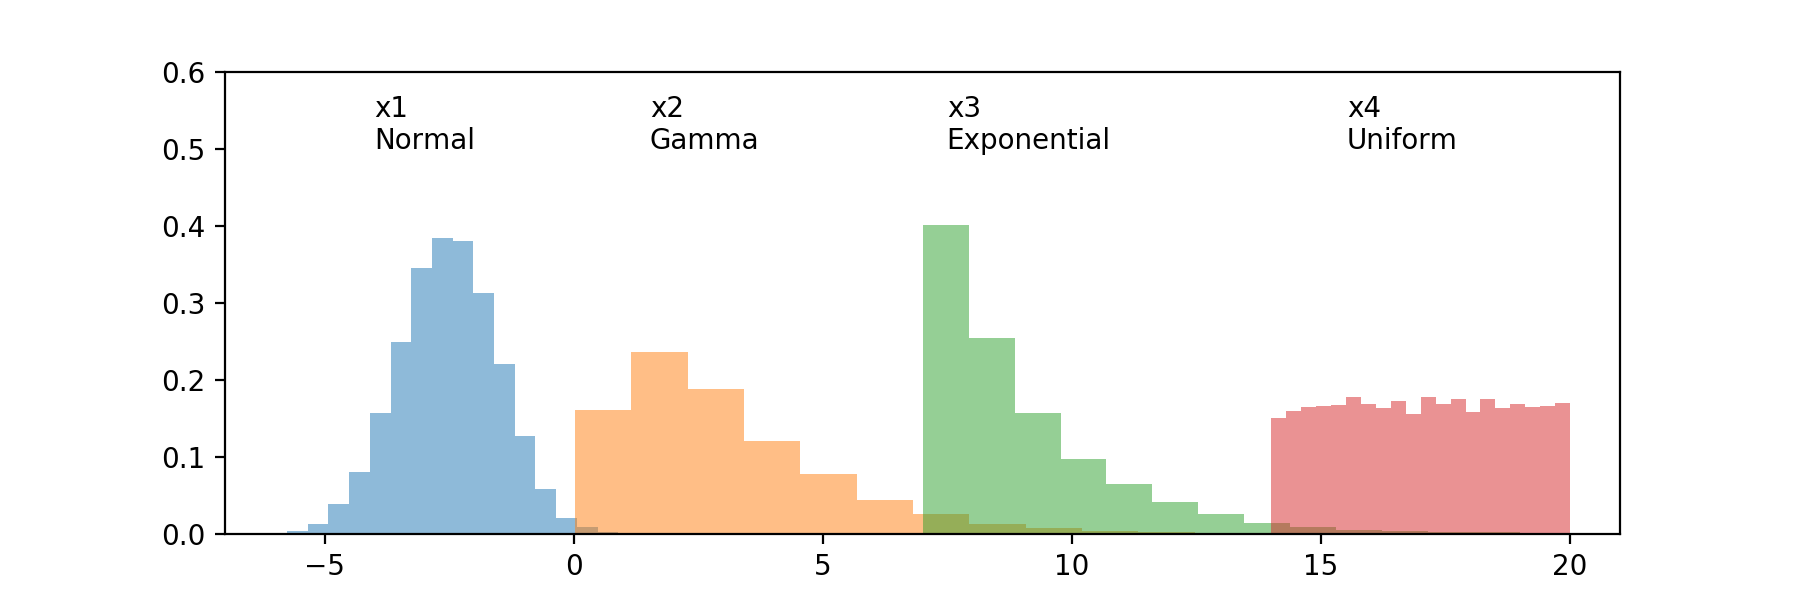

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


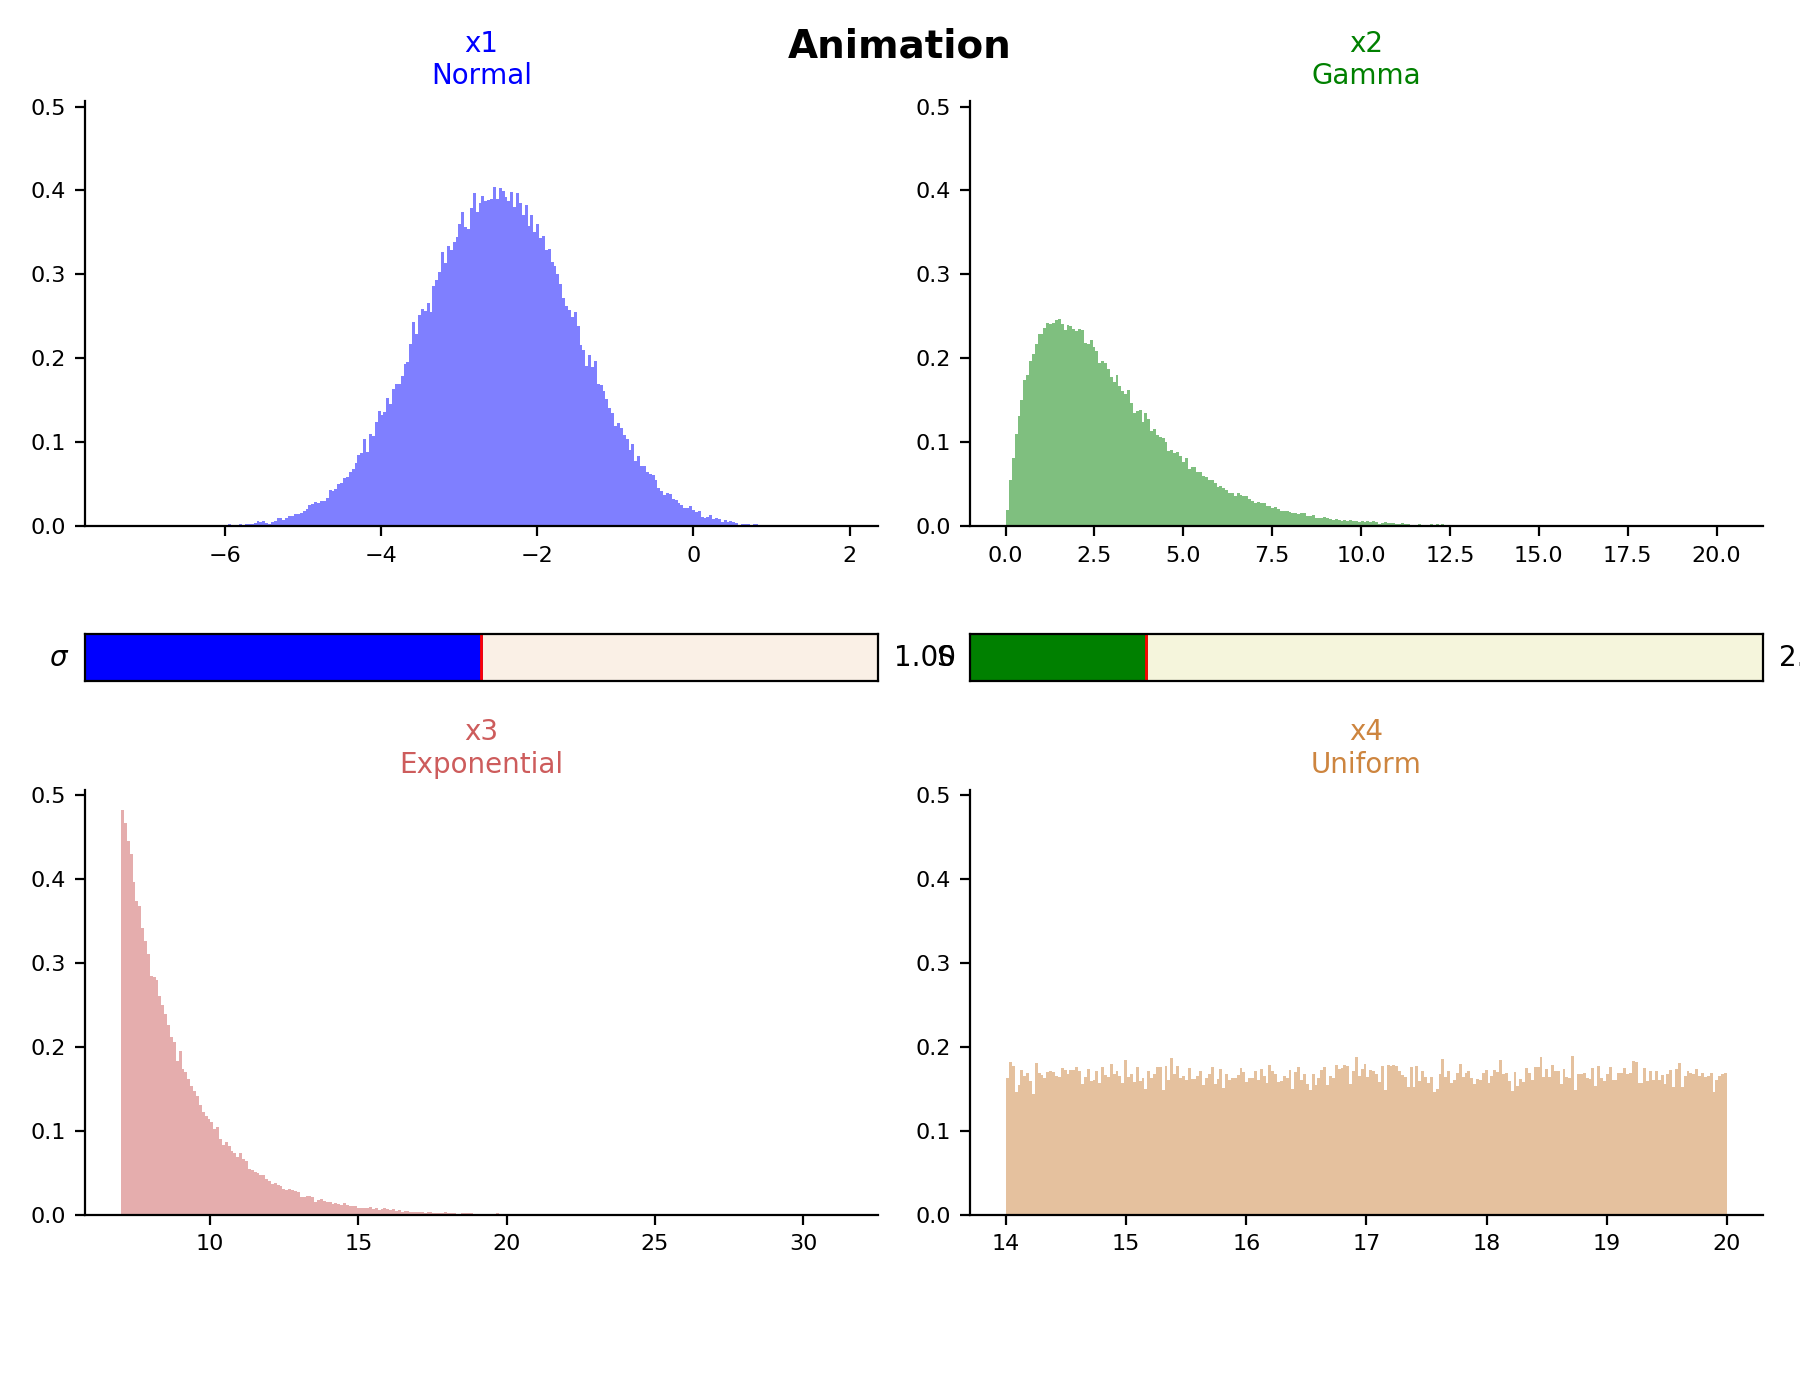

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:88: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:100: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
from matplotlib.widgets import Slider

%matplotlib notebook

iMult=100
i_npar_size=1000*iMult
iFrames=21
i_ani_step=50*iMult
n_bins=250
cstrStart='Start animation'
cstrStop='Stop animation'
anime=None

class cHist:
    
    num_bins=200
    font_size=10
    _ax=None 
    dt=None
    color='black' 
    cap=''
    alpha=0.5
    
    def __init__(self, data, draw_color='black', caption='', bins=n_bins, alfa=0.5, fontsize=10):
        self.dt=data
        self.color=draw_color
        self.cap=caption
        self.num_bins=bins
        self.alpha=alfa
        self.font_size=fontsize

    @property
    def ax(self):
        return self._ax
    
    @ax.setter
    def ax(self, value):
        self._ax = value
        
    def set_ticks_font_size(self):
        for label in (self._ax.get_xticklabels() + self._ax.get_yticklabels()):
            label.set_fontsize(self.font_size-2)

    def write_text(self, strText, x=0.8, y=0.9, f_size=font_size):
        self._ax.text(x, y, strText, fontsize=f_size, transform=self._ax.transAxes, va='center', ha='center')
            
    def write_title(self):
        self._ax.set_title(self.cap, fontsize=self.font_size, color=self.color)
    
    def init_draw(self):
        self.write_title()
        self._ax.spines['top'].set_visible(False)
        self._ax.spines['right'].set_visible(False)
        self.set_ticks_font_size()
        
    def draw_hist(self, srez1=-1, srez0=0):
        self._ax.hist(self.dt[srez0:srez1], normed=True, bins=self.num_bins, alpha=self.alpha, facecolor=self.color)
        self.init_draw()

def init_draw(bDrawHist=False):
    for x in tplAni:
        if bDrawHist:
            x.draw_hist()
        x.init_draw()
    plt.tight_layout()
    
def update(curr):
    global tplAni, iFrames, i_ani_step, init_draw, fig
    fig.suptitle('Animation n = {}'.format(curr*i_ani_step), fontsize=14, fontweight='bold')
    for x in tplAni:
        x.ax.cla()
        x.draw_hist(srez1=curr*i_ani_step)
    return tplAni        
        
x_norm=cHist(np.random.normal(-2.5, 1, i_npar_size), caption='x1\nNormal', draw_color='blue')
x_gamma=cHist(np.random.gamma(2, 1.5, i_npar_size), caption='x2\nGamma', draw_color='green')
x_exp=cHist(np.random.exponential(2, i_npar_size)+7, caption='x3\nExponential', draw_color='indianred')
x_uni=cHist(np.random.uniform(14,20, i_npar_size), caption='x4\nUniform', draw_color='peru')
fig = plt.figure(figsize=(9, 7))
fig.suptitle('Animation', fontsize=14, fontweight='bold')
gs = gridspec.GridSpec(4, 2, height_ratios=[4.5, 0.5, 4.5, 0.5])
x_norm.ax = fig.add_subplot(gs[0, 0])
x_sp=fig.add_subplot(gs[1,0])
x_sp.set_axis_bgcolor('linen')
x_sp.set_xlim(0, 2)
xsp = Slider(x_sp, '$\sigma$', 0, 2, valinit=1, color='blue')

def x_sp_xhange(val):
    x_norm.dt=np.random.normal(-2.5, xsp.val, i_npar_size)
    x_norm.ax.cla()
    x_norm.draw_hist()
    
xsp.on_changed(x_sp_xhange)    
x_gamma.ax = fig.add_subplot(gs[0,1], sharey=x_norm.ax)
x_sh=fig.add_subplot(gs[1,1])
x_sh.set_axis_bgcolor('beige')
x_sh.set_xlim(0, 9)
xsh = Slider(x_sh, 'S', 0, 9, valinit=2, color='green')

def x_sh_xhange(val):
    x_gamma.dt=np.random.gamma(val, 1.5, i_npar_size)
    x_gamma.ax.cla()
    x_gamma.draw_hist()

xsh.on_changed(x_sh_xhange)
x_exp.ax = fig.add_subplot(gs[2,0], sharey=x_norm.ax)
x_uni.ax = fig.add_subplot(gs[2,1], sharey=x_norm.ax)
tplAni=(x_norm, x_gamma, x_exp, x_uni)
init_draw(bDrawHist=True)